In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [25]:
class AutoEncoder(nn.Module):
    
    def __init__(self):
        super(AutoEncoder,self).__init__()
        
        self.encoder1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 5, stride = 2, padding = 2),
            nn.BatchNorm2d(num_features = 16),
            nn.ReLU()
        )
        self.encoder2 = nn.Sequential(
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = 32),
            nn.ReLU()
        )
        self.encoder3 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 16, kernel_size = 3, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = 16),
            nn.ReLU()
        )
        self.encoder4 = nn.Sequential(
            nn.Conv2d(in_channels = 16, out_channels = 8, kernel_size = 3, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = 8),
            nn.ReLU()
        )
        
        self.decoder4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 2, padding = 1, output_padding=1),
            nn.BatchNorm2d(num_features = 16),
            nn.ReLU()
        )
        self.decoder3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 2, padding = 1, output_padding=1),
            nn.BatchNorm2d(num_features = 32),
            nn.ReLU()
        )
        self.decoder2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 32, out_channels = 16, kernel_size = 3, stride = 2, padding = 1,output_padding=1),
            nn.BatchNorm2d(num_features = 16),
            nn.ReLU()
        )
        self.decoder1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 16, out_channels = 3, kernel_size = 5, stride = 2,padding = 2,output_padding=1),
            nn.BatchNorm2d(num_features = 3),
            nn.ReLU()
        )
        
        self.encoder = [self.encoder1,self.encoder2,self.encoder3,self.encoder4]
        self.decoder = [self.decoder4,self.decoder3,self.decoder2,self.decoder1]
    
    def forward(self,x):
        out = x
        for i in range(len(self.encoder)):
            out = self.encoder[i](out)
        lda = out
        for i in range(len(self.decoder)):
            out = self.decoder[i](out)
        return lda,out
        

In [27]:
device = torch.device("cuda:0")
graph = AutoEncoder().to(device)

In [4]:
import numpy as np

In [5]:
data = np.load('data.npy')

In [6]:
dataset = DataLoader(data[:100000],batch_size = 128,shuffle=True)
test = DataLoader(data[100000:data.shape[0]],batch_size = 128)

In [28]:
optimizer = torch.optim.SGD(graph.parameters(), lr = 0.1, momentum=0.9)
mse = nn.MSELoss()
for i in range(100):
    train_loss = []
    for batch in dataset:
        batch = batch.float().cuda()
        optimizer.zero_grad()
        out_ = graph(batch)[1]
        loss = mse(out_,batch)
        train_loss.append(loss.data)
        loss.backward(retain_graph=True)
        optimizer.step()
    test_loss = []
    for batch in test:
        batch = batch.float().cuda()
        out_ = graph(batch)[1]
        loss = mse(out_,batch)
        test_loss.append(loss.data)
        
    print("Epoch %d: Training Loss: %0.3f \t Testing Loss: %0.3f" % (i,np.mean(train_loss),np.mean(test_loss)))
        
        
        
        

Epoch 0: Training Loss: 1913.438 	 Testing Loss: 1330.826
Epoch 1: Training Loss: 1306.704 	 Testing Loss: 1304.196
Epoch 2: Training Loss: 1289.767 	 Testing Loss: 1293.002
Epoch 3: Training Loss: 1279.497 	 Testing Loss: 1287.153
Epoch 4: Training Loss: 1270.454 	 Testing Loss: 1272.255
Epoch 5: Training Loss: 1262.030 	 Testing Loss: 1266.916
Epoch 6: Training Loss: 1259.091 	 Testing Loss: 1267.429
Epoch 7: Training Loss: 1254.728 	 Testing Loss: 1263.046
Epoch 8: Training Loss: 1253.261 	 Testing Loss: 1260.496
Epoch 9: Training Loss: 1250.200 	 Testing Loss: 1256.685
Epoch 10: Training Loss: 1248.854 	 Testing Loss: 1252.136
Epoch 11: Training Loss: 1247.242 	 Testing Loss: 1258.647
Epoch 12: Training Loss: 1243.690 	 Testing Loss: 1249.603
Epoch 13: Training Loss: 1242.666 	 Testing Loss: 1250.067
Epoch 14: Training Loss: 1241.899 	 Testing Loss: 1252.294
Epoch 15: Training Loss: 1240.395 	 Testing Loss: 1247.928
Epoch 16: Training Loss: 1239.476 	 Testing Loss: 1246.385
Epoch 1

In [29]:
for x in dataset:
    
    im = x[1:2,:].float().cuda()
    out_ = graph(im)[1][0].data.cpu().numpy()
    im = im[0].cpu().numpy()
    im = np.rollaxis(im, 0, 3).astype(np.uint8)
    out_ = np.clip(np.rollaxis(out_, 0, 3),0,255).astype(np.uint8)
    break

In [10]:
import matplotlib.pyplot as plt

In [11]:
im.shape

(96, 96, 3)

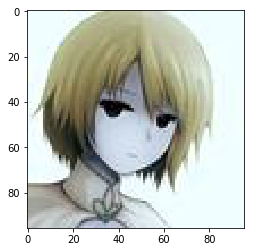

In [30]:
plt.imshow(im)
plt.show()

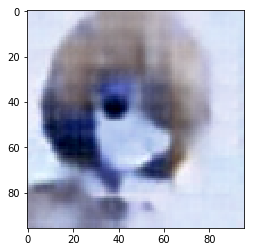

In [31]:
plt.imshow(out_)
plt.show()

** Not bad, let's try other models first tho **